# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

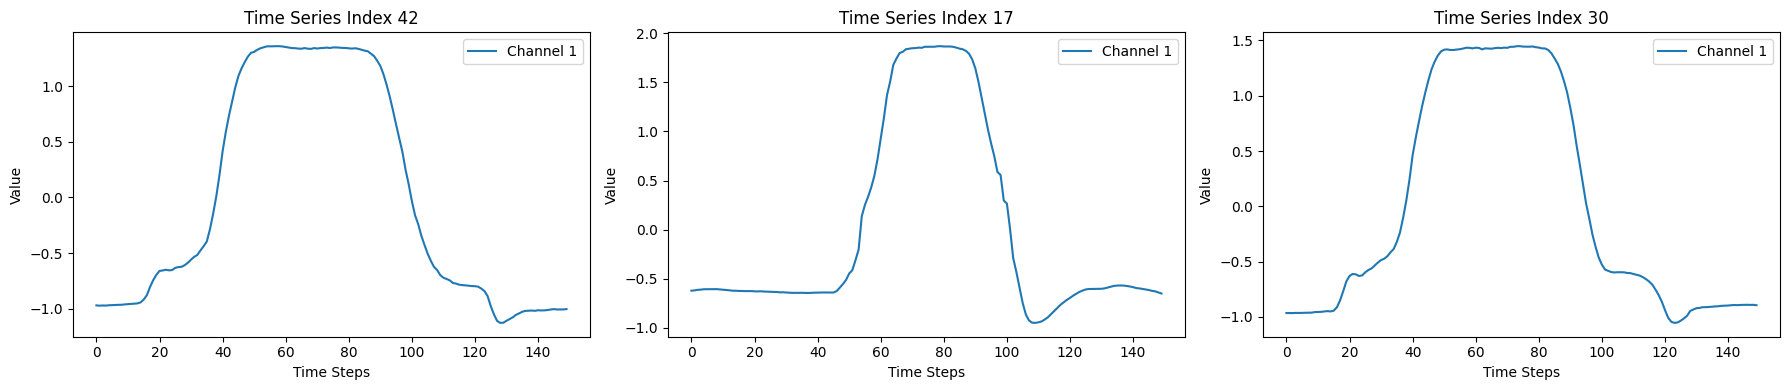

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.9418181818181818)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8872727272727273)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9036363636363637)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9818181818181818)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9418181818181818))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[1.        , 0.47411773, 0.11446693, ..., 0.36373432, 0.08257839,
        0.12946978],
       [0.47411773, 1.        , 0.10284778, ..., 0.50975912, 0.11561431,
        0.16296323],
       [0.11446693, 0.10284778, 1.        , ..., 0.2294142 , 0.29051739,
        0.06383694],
       ...,
       [0.36373432, 0.50975912, 0.2294142 , ..., 1.        , 0.14525228,
        0.09852338],
       [0.08257839, 0.11561431, 0.29051739, ..., 0.14525228, 1.        ,
        0.03414766],
       [0.12946978, 0.16296323, 0.06383694, ..., 0.09852338, 0.03414766,
        1.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
Xstatic = None
Xstatic_test = None

In [7]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

REDCOMETS()

In [8]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[1.        , 0.36598732, 0.13573364, ..., 0.29358749, 0.07895071,
        0.14078553],
       [0.36598732, 1.        , 0.11249207, ..., 0.43099596, 0.11221389,
        0.15466705],
       [0.13573364, 0.11249207, 1.        , ..., 0.1829706 , 0.28620063,
        0.06199481],
       ...,
       [0.29358749, 0.43099596, 0.1829706 , ..., 1.        , 0.13001297,
        0.09105074],
       [0.07895071, 0.11221389, 0.28620063, ..., 0.13001297, 1.        ,
        0.03962093],
       [0.14078553, 0.15466705, 0.06199481, ..., 0.09105074, 0.03962093,
        1.        ]])

In [9]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])